# Sentiment Analysis with LSTM

Loading libraireis

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

load data

In [78]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Restaurant_Reviews.tsv',sep='\t')

In [79]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# Exploring Data

In [81]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

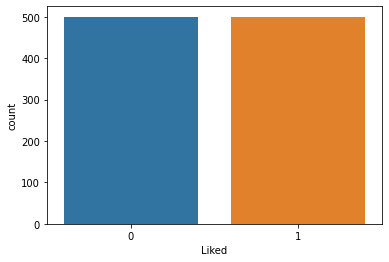

In [82]:
sns.countplot(x=data['Liked'])

# Pre-processing Data (NLTK Text Data Cleaning)

In [ ]:
!pip install contractions
!pip install text2num

1) Importing the libraries of data cleaning

In [84]:
import spacy
from nltk import word_tokenize
from text_to_num import text2num
from spacy.lang.en.stop_words import STOP_WORDS as stopwords_en
import re
import contractions

In [85]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

2) Building a function to clean our data

In [86]:
def cleaning_data(txt):
    # 1  to lower
    txt_lower = txt.lower()

    # 2 expand the shortened words
    expanded_words = []
    for word in txt_lower.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))
    expanded_text = ' '.join(expanded_words)

    # 3 convert numbers words to numbers numeric
    text = []
    for w in expanded_text.split():
        try:
            text.append(str(text2num(w, 'en')))
        except:
            text.append(w)
    txt_number_numeric = " ".join(text)

   # 4 remove all punctuations
    txt_nopunct = re.sub('[^a-zA-Z]', " ", txt_number_numeric)
    
    txt_nopunct =txt_nopunct.split()
    txt_nopunct=' '.join(txt_nopunct)

    # 5 remove stopwords
    #tokens = word_tokenize(txt_nopunct)
    #result = [i for i in tokens if not i in stopwords_en]
    #txt_nostopwords = " ".join(result)

    # 6 lemmatization
    nlp = spacy.load("en_core_web_sm")
    txt_lemma = []
    doc = nlp(txt_nopunct)
    for token in doc:
        txt_lemma.append(token.lemma_)
    return " ".join(txt_lemma)

3) Create a Review Cleaned  column

In [87]:
data['Review cleaned']=data['Review'].apply(cleaning_data)

In [89]:
data

,Review,Liked,Review cleaned
0,Wow... Loved this place.,1,wow love this place
1,Crust is not good.,0,crust be not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture be just nasty
3,Stopped by during the late May bank holiday of...,1,stop by during the late may bank holiday off r...
4,The selection on the menu was great and so wer...,1,the selection on the menu be great and so be t...
...,...,...,...
995,I think food should have flavor and texture an...,0,I think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly go
997,Overall I was not impressed and would not go b...,0,overall I be not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience be underwhelming and I th...


In [90]:
def size_list(txt):
  list_words=txt.split()
  return len(list_words)

In [91]:
data['Review Count']=data['Review cleaned'].apply(size_list)

In [92]:
data

,Review,Liked,Review cleaned,Review Count
0,Wow... Loved this place.,1,wow love this place,4
1,Crust is not good.,0,crust be not good,4
2,Not tasty and the texture was just nasty.,0,not tasty and the texture be just nasty,8
3,Stopped by during the late May bank holiday of...,1,stop by during the late may bank holiday off r...,15
4,The selection on the menu was great and so wer...,1,the selection on the menu be great and so be t...,12
...,...,...,...,...
995,I think food should have flavor and texture an...,0,I think food should have flavor and texture an...,12
996,Appetite instantly gone.,0,appetite instantly go,3
997,Overall I was not impressed and would not go b...,0,overall I be not impressed and would not go back,10
998,"The whole experience was underwhelming, and I ...",0,the whole experience be underwhelming and I th...,17


In [93]:
data['Review Count'].idxmax()

623

In [138]:
sent_length=data.loc[data['Review Count'].idxmax()][3]
sent_length,data.loc[data['Review Count'].idxmax()][0]

(32,
 'a drive thru means you do not want to wait around for half an hour for your food, but somehow when we end up going here they make us wait and wait.')

4) showing the difference between the cleaned Review and the normal Review

In [95]:
print('Normal Review :',data.loc[data['Review Count'].idxmax()][0],'\n')
print('Cleaned Review :',data.loc[data['Review Count'].idxmax()][2])

Normal Review : a drive thru means you do not want to wait around for half an hour for your food, but somehow when we end up going here they make us wait and wait. 

Cleaned Review : a drive thru mean you do not want to wait around for half an hour for your food but somehow when we end up go here they make we wait and wait


In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SimpleRNN, SpatialDropout1D
from sklearn.model_selection import train_test_split

In [139]:
def encode_text(txt):
  onehot_txt=[one_hot(words,voc_size)for words in txt]
  embedded_txt=pad_sequences(onehot_txt,padding='pre',maxlen=sent_length)
  return np.array(embedded_txt)

In [140]:
### Vocabulary size
voc_size=5000

In [141]:
# Features & Labels
corpus = data['Review cleaned'].values.tolist()
y = data['Liked'].values.tolist()

lables={0:"The person didn't like our restaurant",1:"The person liked our restaurant"}

In [142]:
embedded_docs=encode_text(corpus)
print(embedded_docs)

[[   0    0    0 ... 2112 4093 3220]
 [   0    0    0 ... 4724 1544  881]
 [   0    0    0 ... 4724 2320 4937]
 ...
 [   0    0    0 ... 1544 4630  822]
 [   0    0    0 ...  751 1441  840]
 [   0    0    0 ... 1026 2451 4400]]


In [144]:
embedded_docs[623]

array([4373, 1718, 4319, 2879, 4883,  197, 1544, 3008, 4330, 3483, 2111,
       1678, 2213, 2672, 3232, 1678, 1828,   71, 1701, 2451, 4810, 3915,
       3359,  735, 4630, 3414,  600,  712, 3915, 3483, 2061, 3483],
      dtype=int32)

In [145]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [146]:
X_final.shape,y_final.shape

((1000, 32), (1000,))

In [147]:
#Split Dataset
x_train,x_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,random_state=42)

# Models Training & Building

In [154]:
## Creating model
embedding_vector_features=40
epochs=20
model=Sequential()
model.add(Embedding(input_dim=voc_size,output_dim=embedding_vector_features,input_length=sent_length))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(units=embedding_vector_features,dropout=0.3,recurrent_dropout=0.3))
model.add(Dense(embedding_vector_features,activation='relu'))
model.add(Dropout(0.3))
#model.add(Dense(1,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  continious values
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #classes
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 32, 40)            200000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 32, 40)           0         
 lDropout1D)                                                     
                                                                 
 lstm_11 (LSTM)              (None, 40)                12960     
                                                                 
 dense_18 (Dense)            (None, 40)                1640      
                                                                 
 dropout_15 (Dropout)        (None, 40)                0         
                                                                 
 dense_19 (Dense)            (None, 2)                 82        
                                                     

In [155]:
### Finally Training
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=64)

Epoch 1/20
13/13 [==============================] - 4s 89ms/step - loss: 0.6934 - accuracy: 0.4925 - val_loss: 0.6918 - val_accuracy: 0.6050
Epoch 2/20
13/13 [==============================] - 1s 51ms/step - loss: 0.6892 - accuracy: 0.6025 - val_loss: 0.6882 - val_accuracy: 0.6000
Epoch 3/20
13/13 [==============================] - 1s 50ms/step - loss: 0.6790 - accuracy: 0.5925 - val_loss: 0.6775 - val_accuracy: 0.6150
Epoch 4/20
13/13 [==============================] - 1s 50ms/step - loss: 0.6454 - accuracy: 0.7125 - val_loss: 0.6492 - val_accuracy: 0.6150
Epoch 5/20
13/13 [==============================] - 1s 54ms/step - loss: 0.5457 - accuracy: 0.7950 - val_loss: 0.5816 - val_accuracy: 0.7350
Epoch 6/20
13/13 [==============================] - 1s 50ms/step - loss: 0.4110 - accuracy: 0.8413 - val_loss: 0.5714 - val_accuracy: 0.6400
Epoch 7/20
13/13 [==============================] - 1s 50ms/step - loss: 0.2938 - accuracy: 0.8863 - val_loss: 0.5424 - val_accuracy: 0.6950
Epoch 8/20
13

# Model Evaluation

Text(0, 0.5, 'Accuracy')

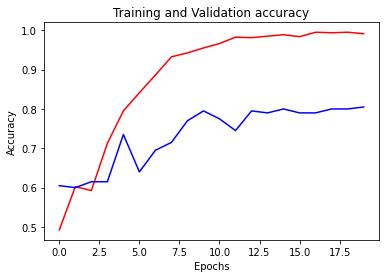

In [156]:
plt.clf()
x_epochs=range(epochs)
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
plt.plot(x_epochs,accuracy,'r',label='Training accuracy')
plt.plot(x_epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

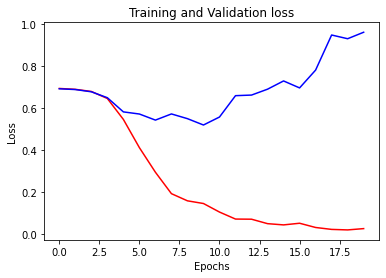

In [157]:
plt.clf()
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(x_epochs,loss,'r',label='Training loss')
plt.plot(x_epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Model Prediction

In [121]:
text=["woow this place is col"]
txt_encoded=encode_text(text)

In [122]:
y_pred=model.predict(txt_encoded)

In [123]:
prediction_list =y_pred[0].tolist()
id_max = y_pred[0].max()
index=prediction_list.index(id_max)

In [124]:
print('The Review   :',text[0],'\n')
print('The Reaction :' ,lables[index])

The Review   : redouane loved this place 

The Reaction : The person liked our restaurant


# Model Deployement & Production

In [125]:
import joblib

Save our model

In [ ]:
joblib.dump(model,'/content/drive/MyDrive/Colab Notebooks/NLP/model.pkl')

Load our model

In [127]:
loaded_model=joblib.load('/content/drive/MyDrive/Colab Notebooks/NLP/model.pkl')

# Thanks.....